In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = FashionMNIST(root="data", train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, num_workers=10, shuffle=True)

testset = FashionMNIST(root="data", train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, num_workers=10, shuffle=False)

In [5]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [6]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [16]:
train_losses, train_acc = [], []
val_losses, val_acc = [], []

for epoch in range(num_epochs):
    # Set model to training mode
    model.train()
    t_loss, t_acc = 0, 0
    cnt = 0
    for X, y in trainloader:
        # Move inputs and labels to the device
        X, y = X.to(device), y.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X)
        
        # Compute the loss
        loss = criterion(outputs, y)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate loss and accuracy
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    
    # Compute average training loss and accuracy for the epoch
    t_loss /= len(trainloader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)
    
    # Set model to evaluation mode
    model.eval()
    v_loss, v_acc = 0, 0
    cnt = 0
    with torch.no_grad():
        for X, y in testloader:
            # Move inputs and labels to the device
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            outputs = model(X)
            
            # Compute the loss
            loss = criterion(outputs, y)
            
            # Accumulate loss and accuracy
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    
    # Compute average validation loss and accuracy for the epoch
    v_loss /= len(testloader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {t_loss:.4f}, Accuracy: {t_acc:.4f}, Test Loss: {v_loss:.4f}, Test Accuracy: {v_acc:.4f}")

Epoch [1/300], Loss: 2.3027, Accuracy: 0.0994, Test Loss: 2.3027, Test Accuracy: 0.1000
Epoch [2/300], Loss: 2.3027, Accuracy: 0.1016, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [3/300], Loss: 2.3028, Accuracy: 0.1006, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [4/300], Loss: 2.3027, Accuracy: 0.1006, Test Loss: 2.3027, Test Accuracy: 0.1000
Epoch [5/300], Loss: 2.3028, Accuracy: 0.1002, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [6/300], Loss: 2.3028, Accuracy: 0.0993, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [7/300], Loss: 2.3028, Accuracy: 0.0987, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [8/300], Loss: 2.3028, Accuracy: 0.0975, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [9/300], Loss: 2.3027, Accuracy: 0.0995, Test Loss: 2.3026, Test Accuracy: 0.1000
Epoch [10/300], Loss: 2.3027, Accuracy: 0.1003, Test Loss: 2.3027, Test Accuracy: 0.1000
Epoch [11/300], Loss: 2.3027, Accuracy: 0.0997, Test Loss: 2.3029, Test Accuracy: 0.1000
Epoch [12/300], Loss: 2.3028, 

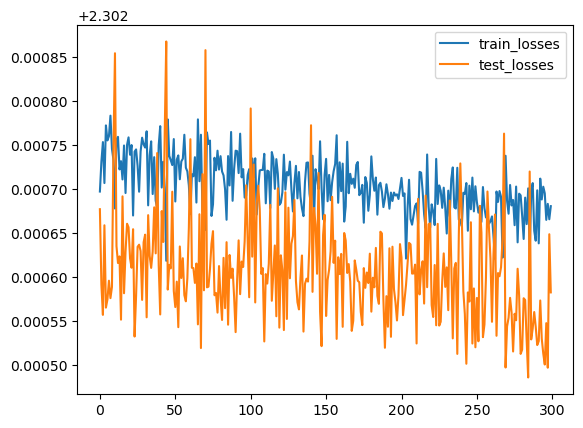

In [17]:
plt.plot(train_losses, label='train_losses')
plt.plot(val_losses, label='test_losses')
plt.legend()
plt.show()

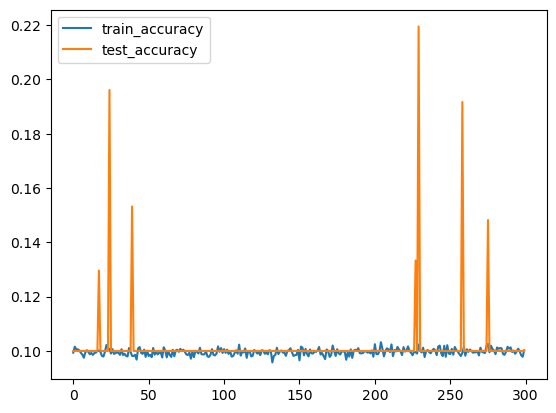

In [18]:
plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='test_accuracy')
plt.legend()
plt.show()